
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [2]:
import pandas as pd

# Create Dataframe

städer = pd.Series(["Malmö", "Stockholm", "Uppsala", "Göteborg"])
population = pd.Series(["347949", "975551", "233839", "583056"])

swepop = pd.DataFrame({"Kommun": städer, "Population": population})
swepop

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
# Print only row with Göteborg
# iloc, index position, loc index name/label

swepop.iloc[3]

Kommun        Göteborg
Population      583056
Name: 3, dtype: object

In [4]:
# Or by filter
swepop[swepop["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [5]:
# Sort the cities, # inplace = true. Samma som df = df.ex(edit).   

swepop.sort_values("Population", inplace=True)
swepop

,Kommun,Population
2,Uppsala,233839
0,Malmö,347949
3,Göteborg,583056
1,Stockholm,975551


In [7]:
# Filter out the three largest cities

swepop[3:]


,Kommun,Population
1,Stockholm,975551


In [10]:
# The whole population in Sweden 2020 is 10379295. 
# Use this number to create a new column in your sorted DataFrame named: Population (%). 
# This column should be filled with percentage of the Swedish population for each city. 

swepop["Percentage"] = (swepop["Population"].astype(int) / 10379295) * 100
swepop

,Kommun,Population,Percentage
2,Uppsala,233839,2.252937
0,Malmö,347949,3.352338
3,Göteborg,583056,5.617491
1,Stockholm,975551,9.399010


---

## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [15]:
import pandas as pd


# Read in the Data, Only sheet part (tab) Totalt
path = "../Data/komtopp50_2020.xlsx"
df1 = pd.read_excel(path, sheet_name="Totalt")


# Cut out the first 5 rows
populationdata = df1[6:]  # skip top index 6 where data starts


# Rename Columns
populationdata = populationdata.rename(
    columns={
        "Unnamed: 0": "Rang 2020",
        "Unnamed: 1": "Rang 2019",
        "Unnamed: 2": "Kommun",
        "Unnamed: 3": "Folkmängd 2020",
        "Unnamed: 4": "Folkmängd 2019",
        "Unnamed: 5": "Förändring",
    }
)

# Reset index
populationdata.reset_index(inplace=True, drop=True)

# Data is clean now

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


In [23]:
# Sort the cities from largest to smallest

populationdata_sorted = populationdata.sort_values(by=["Folkmängd 2020"], ascending=False)

# Filter out the five smallest cities

populationdata_sorted.tail(5)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309
12,290,290.0,Bjurholm,2387,2408.0,-0.872093


In [27]:
# Calculate Swedens population for 2020 and 2019

totalpop2019 = populationdata["Folkmängd 2019"].sum()
totalpop2020 = populationdata["Folkmängd 2020"].sum()

print(f"Total Population for 2019 was: {totalpop2019:.0f}\nTotal Population for 2020 was: {totalpop2020:.0f}")

Total Population for 2019 was: 10327589
Total Population for 2020 was: 10379295


Text(0.5, 1.0, 'Smallest 5 Cities')

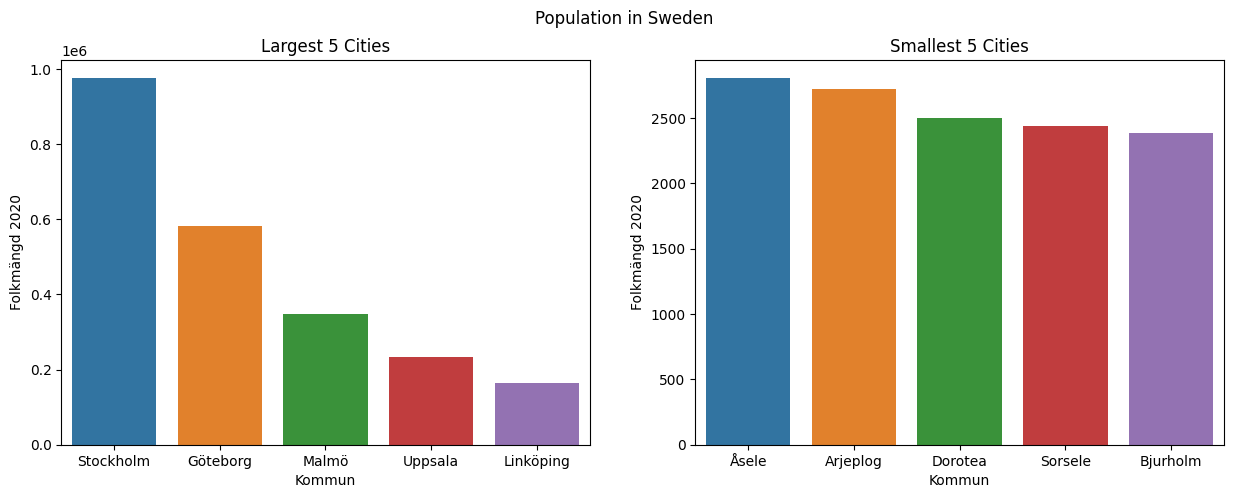

In [34]:
# Plot a bar chart for the five smallest and largest cities
# prepare the data

largest_five = populationdata_sorted.head(5)
smallest_five = populationdata_sorted.tail(5)

import matplotlib.pyplot as plt
import seaborn as sns
# plot the data

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Population in Sweden')

# largest five
sns.barplot(ax=ax[0], x=largest_five["Kommun"], y=largest_five["Folkmängd 2020"])
ax[0].set_title("Largest 5 Cities")

# smallest five
sns.barplot(ax=ax[1], x=smallest_five["Kommun"], y=smallest_five["Folkmängd 2020"])
ax[1].set_title("Smallest 5 Cities")


---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [46]:
# Import data set for male and female
import pandas as pd



# A function for automation

def import_datasets(path, sheet):
    # Read in the Data, Only sheet part (tab) Totalt
    df1 = pd.read_excel(path, sheet_name=sheet)


    # Cut out the first 5 rows
    populationdata = df1[6:]  # skip top index 6 where data starts


    # Rename Columns
    populationdata = populationdata.rename(
        columns={
            "Unnamed: 0": "Rang 2020",
            "Unnamed: 1": "Rang 2019",
            "Unnamed: 2": "Kommun",
            "Unnamed: 3": "Folkmängd 2020",
            "Unnamed: 4": "Folkmängd 2019",
            "Unnamed: 5": "Förändring",
        }
    )
    # Reset index
    populationdata.reset_index(inplace=True, drop=True)
    return populationdata

import_datasets("../Data/komtopp50_2020.xlsx", "Män")

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,81,83.0,Ale,16256,16054.0,1.258253
1,64,64.0,Alingsås,20702,20646.0,0.271239
2,122,123.0,Alvesta,10367,10339.0,0.270819
3,255,255.0,Aneby,3503,3498.0,0.142939
4,169,168.0,Arboga,7094,7114.0,-0.281136
...,...,...,...,...,...,...
285,52,55.0,Österåker,23647,23132.0,2.226353
286,115,115.0,Östhammar,11405,11447.0,-0.366908
287,158,156.0,Östra Göinge,7747,7745.0,0.025823
288,284,284.0,Överkalix,1730,1737.0,-0.402994


In [47]:
# 2 separate datasets

df_man = import_datasets("../Data/komtopp50_2020.xlsx", "Män")
df_man["Kön"] = "Man"

df_kvinna = import_datasets("../Data/komtopp50_2020.xlsx", "Kvinnor")
df_kvinna["Kön"] = "Kvinna" 


In [50]:
# Merge the 2 datasets vertically, should result in 580 rows

both_genders =  pd.concat([df_man, df_kvinna])
both_genders.drop(['Rang 2020', 'Rang 2019'], axis = 1, inplace = True) 
both_genders

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,16256,16054.0,1.258253,Man
1,Alingsås,20702,20646.0,0.271239,Man
2,Alvesta,10367,10339.0,0.270819,Man
3,Aneby,3503,3498.0,0.142939,Man
4,Arboga,7094,7114.0,-0.281136,Man
...,...,...,...,...,...
285,Österåker,22997,22442.0,2.473042,Kvinna
286,Östhammar,10846,10803.0,0.398038,Kvinna
287,Östra Göinge,7270,7262.0,0.110162,Kvinna
288,Överkalix,1559,1578.0,-1.204056,Kvinna


In [54]:
total_set = import_datasets("../Data/komtopp50_2020.xlsx", "Totalt")
total_set.drop(["Rang 2020", "Rang 2019"], inplace=True, axis=1)
total_set.rename(
    {"Folkmängd 2020": "Total Pop 2020",
    "Folkmängd 2019": "Total Pop 2019",
    "Förändring": "Total Förändring"}, inplace=True, axis=1)

total_set

,Kommun,Total Pop 2020,Total Pop 2019,Total Förändring
0,Ale,31868,31402.0,1.483982
1,Alingsås,41602,41420.0,0.439401
2,Alvesta,20224,20134.0,0.447005
3,Aneby,6821,6848.0,-0.394276
4,Arboga,14039,14087.0,-0.34074
...,...,...,...,...
285,Österåker,46644,45574.0,2.34783
286,Östhammar,22251,22250.0,0.004494
287,Östra Göinge,15017,15007.0,0.066636
288,Överkalix,3289,3315.0,-0.784314


In [64]:
# merge total men and women datasets

df_merge = pd.merge(both_genders, total_set, how="outer", on=["Kommun"])
df_merge = df_merge.sort_values(by=["Total Pop 2020", "Kön"], ascending=False)
df_merge.head()




,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
396,Stockholm,482982,482220.0,0.158019,Man,975551,974073.0,0.151734
397,Stockholm,492569,491853.0,0.145572,Kvinna,975551,974073.0,0.151734
114,Göteborg,292505,290308.0,0.756782,Man,583056,579281.0,0.65167
115,Göteborg,290551,288973.0,0.546072,Kvinna,583056,579281.0,0.65167
268,Malmö,172538,170623.0,1.122357,Man,347949,344166.0,1.099179


## Make some plots

In [ ]:

# Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*)


In [ ]:

# Create a pie chart showing the total male and female population in Sweden 2020. (*)

# Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

# Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

# Feel free to investigate other questions you are interested in using these datasets. (*), (**)












---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---